## This code includes the following features:

### Database Management:
- Creates a SQLite database.
- Defines a table specifically for storing PCB design files.
- Offers basic CRUD (Create, Read, Update, Delete) operations to manage the data within the database.

### Issue Tracking and Management:
- Enables users to create issues to track bugs, enhancements, and other tasks.
- Allows for issue categorization (e.g., bug, enhancement).
- Supports prioritization of issues based on importance.
- Facilitates assignment of issues to specific team members.

### Version Control Integration:
- Integrates basic version control features.
- Allows users to check-in and check-out PCB design files, similar to Git functionality.
- Maintains version history to track changes over time, enabling review of file modifications.

### Project Dashboard and Reporting:

- A dashboard for an overview of all PCB design projects, including their current status, recent updates, and pending tasks.
- Reporting features that allow users to generate status reports and performance metrics.

### Revision Locking and Unlocking:

- A feature to lock revisions of PCB designs, preventing further changes, akin to Perforce's file locking mechanism.

### Workflow Automation:

- An automated workflows for common processes, such as automatic notifications when a PCB design is updated or when an issue is resolved.

### Branching and Merging for Designs:

- Similar to Git, we have the concept of branching and merging for PCB designs. 
- This allows for experimenting with different design variations without affecting the main design.

### REST API for Integration:

- RESTful API to allow integration with other tools and platforms, enhancing the interoperability of your system.

### Database Management:
- Creates a SQLite database.
- Defines a table specifically for storing PCB design files.
- Offers basic CRUD (Create, Read, Update, Delete) operations to manage the data within the database.

1. Setting up the SQLite Database

In [4]:
import sqlite3

def create_connection(db_file):
    """ Create a database connection to the SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Exception as e:
        print(e)
    return conn

def create_table(conn):
    """ Create table for storing PCB design files """
    try:
        cursor = conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS pcb_designs (
                file_id INTEGER PRIMARY KEY,
                file_name TEXT NOT NULL,
                version TEXT,
                creation_date TEXT
            )
        """)
        conn.commit()
    except Exception as e:
        print(e)

# Initialize the database
db_file = 'pcb_plm.db'
conn = create_connection(db_file)
create_table(conn)


2. Basic CRUD Operations

In [5]:
def add_pcb_design(conn, pcb_design):
    """ Add a new PCB design file to the database """
    sql = ''' INSERT INTO pcb_designs(file_name, version, creation_date)
              VALUES(?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, pcb_design)
    conn.commit()
    return cur.lastrowid

def get_pcb_design(conn, file_id):
    """ Query PCB design by id """
    cur = conn.cursor()
    cur.execute("SELECT * FROM pcb_designs WHERE file_id=?", (file_id,))
    return cur.fetchone()

def update_pcb_design(conn, pcb_design):
    """ Update a PCB design file """
    sql = ''' UPDATE pcb_designs
              SET file_name = ?, version = ?, creation_date = ?
              WHERE file_id = ?'''
    cur = conn.cursor()
    cur.execute(sql, pcb_design)
    conn.commit()

def delete_pcb_design(conn, file_id):
    """ Delete a PCB design file by file_id """
    sql = 'DELETE FROM pcb_designs WHERE file_id=?'
    cur = conn.cursor()
    cur.execute(sql, (file_id,))
    conn.commit()


Example Usage
Here's how you can use these functions:

In [7]:
# Add a new PCB design
pcb_design = ('example_pcb_v1', '1.0', '2024-01-10')
file_id = add_pcb_design(conn, pcb_design)

# Get the newly added design
print(get_pcb_design(conn, file_id))

# Update the PCB design
update_pcb_design(conn, ('example_pcb_v2', '2.0', '2024-01-11', file_id))

# Delete the PCB design
# delete_pcb_design(conn, file_id)


(6, 'example_pcb_v1', '1.0', '2024-01-10', None, 0)


### Issue Tracking and Management:
- Enables users to create issues to track bugs, enhancements, and other tasks.
- Allows for issue categorization (e.g., bug, enhancement).
- Supports prioritization of issues based on importance.
- Facilitates assignment of issues to specific team members.

Step 1: Define a Table for Issue Tracking

In [8]:
def create_issue_table(conn):
    """ Create table for storing issues related to PCB designs """
    try:
        cursor = conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS pcb_issues (
                issue_id INTEGER PRIMARY KEY,
                pcb_file_id INTEGER,
                description TEXT,
                category TEXT,
                priority INTEGER,
                status TEXT,
                assigned_to TEXT,
                FOREIGN KEY (pcb_file_id) REFERENCES pcb_designs (file_id)
            )
        """)
        conn.commit()
    except Exception as e:
        print(e)
        
create_issue_table(conn)

Step 2: Functions for Issue Tracking Operations
Next, we'll add functions to handle operations such as creating, reading, updating, and deleting issues.

In [9]:
def create_issue(conn, issue):
    """ Add a new issue related to a PCB design file """
    sql = ''' INSERT INTO pcb_issues(pcb_file_id, description, category, priority, status, assigned_to)
              VALUES(?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, issue)
    conn.commit()
    return cur.lastrowid

def get_issue(conn, issue_id):
    """ Query issue by id """
    cur = conn.cursor()
    cur.execute("SELECT * FROM pcb_issues WHERE issue_id=?", (issue_id,))
    return cur.fetchone()

def update_issue(conn, issue):
    """ Update an issue """
    sql = ''' UPDATE pcb_issues
              SET pcb_file_id = ?, description = ?, category = ?, priority = ?, status = ?, assigned_to = ?
              WHERE issue_id = ?'''
    cur = conn.cursor()
    cur.execute(sql, issue)
    conn.commit()

def delete_issue(conn, issue_id):
    """ Delete an issue by issue_id """
    sql = 'DELETE FROM pcb_issues WHERE issue_id=?'
    cur = conn.cursor()
    cur.execute(sql, (issue_id,))
    conn.commit()


Step 3: Example Usage
Here's how you can use these functions to manage issues:

In [10]:
# Create an issue
issue = (1, 'Power supply mismatch', 'bug', 2, 'open', 'John Doe')
issue_id = create_issue(conn, issue)

# Get the created issue
print(get_issue(conn, issue_id))

# Update the issue
update_issue(conn, (1, 'Power supply mismatch', 'bug', 1, 'resolved', 'Jane Smith', issue_id))

# Delete the issue
# delete_issue(conn, issue_id)


(3, 1, 'Power supply mismatch', 'bug', 2, 'open', 'John Doe')


### Version Control Integration:
- Integrates basic version control features.
- Allows users to check-in and check-out PCB design files, similar to Git functionality.
- Maintains version history to track changes over time, enabling review of file modifications.

**Step 1: Extend the PCB Design Table for Version Control** <br>
modify the pcb_designs table to include additional fields necessary for version control, like last_modified and is_checked_out

In [11]:
def modify_pcb_design_table_for_version_control(conn):
    """ Modify the PCB design table to include version control fields """
    try:
        cursor = conn.cursor()
        cursor.execute("""
            ALTER TABLE pcb_designs
            ADD COLUMN last_modified TEXT;
        """)
        cursor.execute("""
            ALTER TABLE pcb_designs
            ADD COLUMN is_checked_out BOOLEAN NOT NULL DEFAULT 0;
        """)
        conn.commit()
    except Exception as e:
        print(e)
        
modify_pcb_design_table_for_version_control(conn)

duplicate column name: last_modified


**Step 2: Functions for Version Control Operations** <br>
Implement functions to handle check-in, check-out, and version history tracking of PCB design files.

In [12]:
def check_out_pcb_design(conn, file_id, user):
    """ Check out a PCB design file for editing """
    sql = ''' UPDATE pcb_designs
              SET is_checked_out = 1,
                  last_modified = datetime('now')
              WHERE file_id = ?'''
    cur = conn.cursor()
    cur.execute(sql, (file_id,))
    conn.commit()
    # Log this action
    log_version_history(conn, file_id, f"Checked out by {user}")

def check_in_pcb_design(conn, file_id, user):
    """ Check in a PCB design file after editing """
    sql = ''' UPDATE pcb_designs
              SET is_checked_out = 0,
                  last_modified = datetime('now')
              WHERE file_id = ?'''
    cur = conn.cursor()
    cur.execute(sql, (file_id,))
    conn.commit()
    # Log this action
    log_version_history(conn, file_id, f"Checked in by {user}")

def log_version_history(conn, file_id, action):
    """ Log the version history of PCB design files """
    sql = ''' INSERT INTO pcb_version_history(file_id, action, timestamp)
              VALUES(?,?,datetime('now')) '''
    cur = conn.cursor()
    cur.execute(sql, (file_id, action))
    conn.commit()


**Step 3: Create a Table for Version History Logs** <br>
A new table is needed to track the version history of each PCB design file.

In [13]:
def create_version_history_table(conn):
    """ Create table for storing version history of PCB designs """
    try:
        cursor = conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS pcb_version_history (
                history_id INTEGER PRIMARY KEY,
                file_id INTEGER,
                action TEXT,
                timestamp TEXT,
                FOREIGN KEY (file_id) REFERENCES pcb_designs (file_id)
            )
        """)
        conn.commit()
    except Exception as e:
        print(e)

create_version_history_table(conn)


The log_version_history function is called within the check-in and check-out functions to automatically log these actions. You can expand this to include more detailed logging.

Step 4: Example Usage
Here's how you can use these functions:

In [14]:
# Check out a PCB design
check_out_pcb_design(conn, file_id=1, user='Alice')

# Check in the PCB design
check_in_pcb_design(conn, file_id=1, user='Alice')


### Project Dashboard and Reporting:
- A dashboard for an overview of all PCB design projects, including their current status, recent updates, and pending tasks.
- Reporting features that allow users to generate status reports and performance metrics.

**Step 1: Install Required Libraries**

In [21]:
!pip install matplotlib pandas
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


**Step 2: Create Functions for Data Retrieval**

In [16]:
import pandas as pd

def get_all_pcb_designs(conn):
    """ Retrieve all PCB designs for dashboard display """
    query = "SELECT * FROM pcb_designs"
    return pd.read_sql_query(query, conn)

def get_all_issues(conn):
    """ Retrieve all issues for reporting """
    query = "SELECT * FROM pcb_issues"
    return pd.read_sql_query(query, conn)

**Step 3: Create Dashboard and Reports**

In [22]:
import matplotlib.pyplot as plt

def create_dashboard(conn):
    """ Create a simple dashboard showing PCB designs and issues """
    pcb_designs = get_all_pcb_designs(conn)
    issues = get_all_issues(conn)

    # Plotting the number of designs and issues
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['Designs', 'Issues'], [len(pcb_designs), len(issues)])
    plt.title('PCB Designs vs Issues')

    # Other visualizations can be added here

    plt.show()

def generate_status_report(conn):
    """ Generate a status report of PCB designs and issues """
    pcb_designs = get_all_pcb_designs(conn)
    issues = get_all_issues(conn)

    # You can add more complex analysis and data processing here

    # Saving to an Excel file
    with pd.ExcelWriter('PCB_Designs_Report.xlsx') as writer:
        pcb_designs.to_excel(writer, sheet_name='PCB Designs')
        issues.to_excel(writer, sheet_name='Issues')
    print("Report generated: PCB_Designs_Report.xlsx")



**Step 4: Usage**

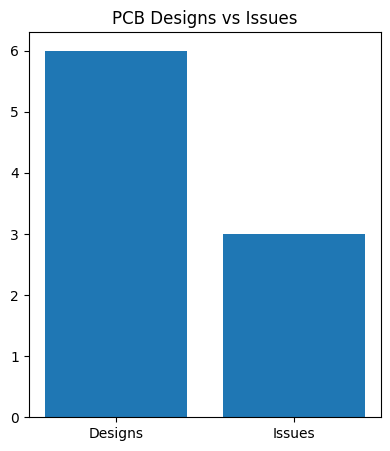

Report generated: PCB_Designs_Report.xlsx


In [23]:
# Assuming conn is your established SQLite connection

# Create and display the dashboard
create_dashboard(conn)

# Generate and save a status report
generate_status_report(conn)

### Revision Locking and Unlocking:
- A feature to lock revisions of PCB designs, preventing further changes, akin to Perforce's file locking mechanism.

### Workflow Automation:
- An automated workflows for common processes, such as automatic notifications when a PCB design is updated or when an issue is resolved.

### Branching and Merging for Designs:
- Similar to Git, we have the concept of branching and merging for PCB designs. 
- This allows for experimenting with different design variations without affecting the main design.

### REST API for Integration:
- RESTful API to allow integration with other tools and platforms, enhancing the interoperability of your system.